### Libraries 

In [1]:
### Nen ghi ra file text sau moi lan chay,
### tien xu ly nen bo cac trang web co link


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from pandas_profiling import ProfileReport
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import demoji
import dask
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster
from pyvi import ViPosTagger, ViTokenizer
import string
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/var/folders/6v/nymwmjk912d8glyc17sfhddr0000gn/T/ipykernel_5339/1494690340.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [3]:
df1 = pd.read_csv("Products_Shopee_comments.csv", encoding="utf-8")

In [4]:
df1.head()

,product_id,category,sub_category,user,rating,comment
0,32,Điện Thoại & Phụ Kiện,Bảo vệ màn hình,sangth63,3,Miếng dán hơi dầy ko thẩm mỹ. Qan trong là ko ...
1,32,Điện Thoại & Phụ Kiện,Bảo vệ màn hình,truongthinga260787,3,"Mua nhiều miếng dán ở shop rồi, nhưng thật sự ..."
2,32,Điện Thoại & Phụ Kiện,Bảo vệ màn hình,n*****0,3,NaN
3,32,Điện Thoại & Phụ Kiện,Bảo vệ màn hình,hoanhq123,3,NaN
4,32,Điện Thoại & Phụ Kiện,Bảo vệ màn hình,vanguyen411,2,"Giao sai sp, đặt 1 cường lực trắng cho 8+ nhưn..."


In [5]:
#profile = ProfileReport(df)
#profile

In [6]:
df1.shape

(1903157, 6)

In [7]:
df1['rating'].value_counts()

5    1151138
4     284774
3     199896
1     152590
2     114759
Name: rating, dtype: int64

In [8]:
df1['category'].value_counts()

Thời Trang Nam             1041870
Thời Trang Nữ               584108
Mẹ & Bé                     104958
Điện Thoại & Phụ Kiện        97403
Nhà Cửa & Đời Sống           18357
Thiết Bị Điện Tử             17129
Máy Tính & Laptop            14820
Máy Ảnh & Máy Quay Phim       5251
Sắc Đẹp                       1261
Name: category, dtype: int64

#### Cac mat hang chu yeu thuoc nhom:
Thời Trang Nam 
Thời Trang Nữ               
Mẹ & Bé             
Điện Thoại & Phụ Kiện

In [9]:
df1.groupby('rating')['category'].value_counts()

rating  category               
1       Thời Trang Nữ               51928
        Thời Trang Nam              44889
        Điện Thoại & Phụ Kiện       22031
        Mẹ & Bé                     19603
        Nhà Cửa & Đời Sống           5211
        Thiết Bị Điện Tử             3861
        Máy Tính & Laptop            3318
        Máy Ảnh & Máy Quay Phim      1005
        Sắc Đẹp                       385
2       Thời Trang Nữ               44073
        Thời Trang Nam              26247
        Điện Thoại & Phụ Kiện       17459
        Mẹ & Bé                     14483
        Nhà Cửa & Đời Sống           5455
        Thiết Bị Điện Tử             3119
        Máy Tính & Laptop            2504
        Máy Ảnh & Máy Quay Phim       705
        Sắc Đẹp                       522
3       Thời Trang Nữ               69337
        Thời Trang Nam              67419
        Mẹ & Bé                     26594
        Điện Thoại & Phụ Kiện       22240
        Nhà Cửa & Đời Sống           4775
  

###: 
Ta sẽ loại bỏ bớt các nhóm sản phẩm không có nhiều rating:
- Máy Ảnh & Máy Quay Phim 
- Sắc Đẹp

In [10]:
df1 = df1.drop(df1[df1['category'] == 'Máy Ảnh & Máy Quay Phim'].index)
df1 = df1.drop(df1[df1['category'] == 'Sắc Đẹp'].index)

In [11]:
df1.shape

(1896645, 6)

### EDA

### Phân chia theo nhóm
Ta sẽ chia bộ dữ liệu theo thành từng nhóm (class), trong đó:
- 1-2: rating không thích
- 3: rating trung tính
- 4-5: rating thích

#### Rating 'Not Like' 

In [12]:
df_notlike = df1[df1['rating'] < 3 ]

In [13]:
df_notlike['category'].value_counts()

Thời Trang Nữ            96001
Thời Trang Nam           71136
Điện Thoại & Phụ Kiện    39490
Mẹ & Bé                  34086
Nhà Cửa & Đời Sống       10666
Thiết Bị Điện Tử          6980
Máy Tính & Laptop         5822
Name: category, dtype: int64

<AxesSubplot: >

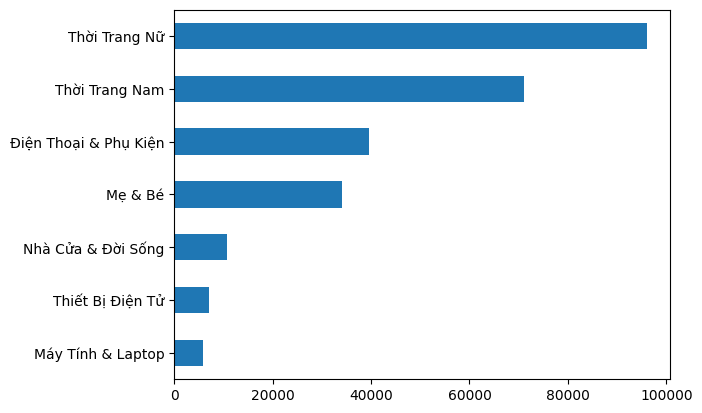

In [14]:
df_notlike.category.value_counts().sort_values().plot(kind = 'barh')

### 
Nhóm rating này tập trung vào 4 nhóm sản phẩm chính:
- Thời trang nam
- Thời trang nữ
- Đt & Phụ kiên
- Mẹ và bé
### Chủ yếu vân là nhóm ngành thời trang

### NEUTRAL

In [15]:
df_neutral= df1[df1['rating'] == 3 ]

In [16]:
df_neutral['category'].value_counts()

Thời Trang Nữ            69337
Thời Trang Nam           67419
Mẹ & Bé                  26594
Điện Thoại & Phụ Kiện    22240
Nhà Cửa & Đời Sống        4775
Thiết Bị Điện Tử          4074
Máy Tính & Laptop         3528
Name: category, dtype: int64

<AxesSubplot: >

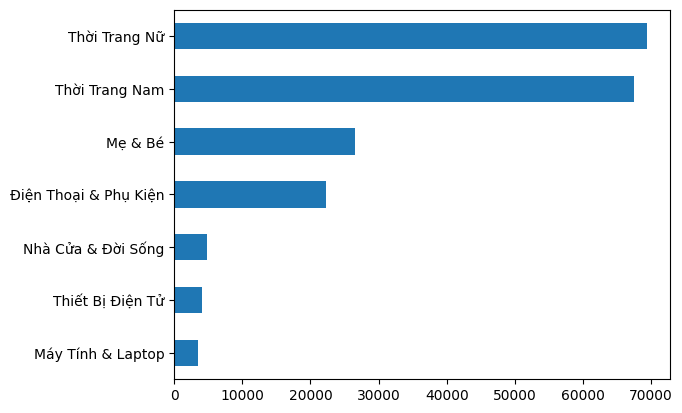

In [17]:
df_neutral.category.value_counts().sort_values().plot(kind = 'barh')

####
- không có sự thay đổi nhiều khi 4 nhóm ngành như đã phân tích phần trên chiếm đa số, rating vẫn chủ yêu là nhóm ngành thời trang

### LIKE

In [18]:
df_like = df1[df1['rating'] > 3 ]

In [19]:
df_like['category'].value_counts()

Thời Trang Nam           903315
Thời Trang Nữ            418770
Mẹ & Bé                   44278
Điện Thoại & Phụ Kiện     35673
Thiết Bị Điện Tử           6075
Máy Tính & Laptop          5470
Nhà Cửa & Đời Sống         2916
Name: category, dtype: int64

<AxesSubplot: >

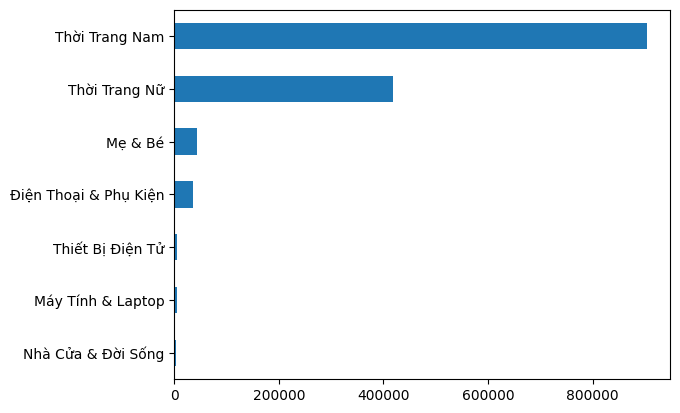

In [20]:
df_like.category.value_counts().sort_values().plot(kind = 'barh')

###
- Ở nhóm rating thích (hài lòng), sự phân biệt rõ rệt khi nhóm ngành thời trang được rating nhiều

### Isnull 
- Kiểm tra isnull để chúng ta xem có cần loại bỏ hay không 
- Và các cột không có comment thường được rating ra sao

In [21]:
df2 = df1[["rating","comment"]].copy()

In [22]:
df2.isna().sum()

rating          0
comment    955139
dtype: int64

In [23]:
df2.isnull().sum()

rating          0
comment    955139
dtype: int64

In [24]:
df_isnull = df2[df2['comment'].isnull()]

In [25]:
df_isnull.head()

,rating,comment
2,3,NaN
3,3,NaN
8,1,NaN
12,1,NaN
14,3,NaN


In [26]:
df_count = df_isnull['rating'].value_counts()
df_result = pd.DataFrame(df_count)
df_result = df_result.reset_index()
df_result.columns = ['rating','value_counts']
print(df_result)

   rating  value_counts
0       5        647505
1       4        143949
2       3         85940
3       1         43620
4       2         34125


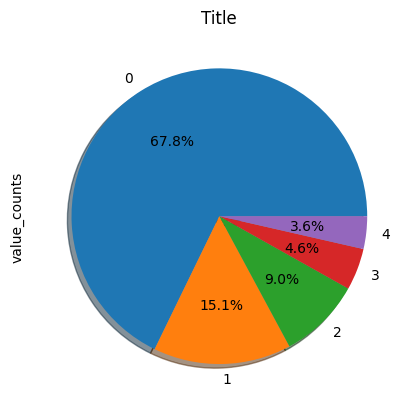

In [27]:
plot = df_result.plot.pie(y='value_counts', title="Title", legend=False, \
                   autopct='%1.1f%%', \
                   shadow=True, startangle=0)

### 
- Có đến hơn 90% Nan values thuộc nhóm rating từ trung tính trở lên, và phần lớn hơn 80% thuộc rating thích.
- Nghĩa là các khách không comment đại đa số là hài lòng hoặc ít nhất không phàn nàn về sản phẩm.
- Nếu ta nhìn lại toàn bộ dataset thì gần 90% bộ dữ liệu thuộc nhóm rating trung tính trở lên, như vậy ta có thể loại bỏ isnull, để bộ dữ liệu không bị chênh lệch quá nhiều.

In [28]:
df3 = df1[~df1['comment'].isnull()]

In [29]:
# Check duplicates
df3.duplicated().sum()

6963

In [30]:
# Drop duplicates
df3.drop_duplicates(inplace=True)

In [31]:
df_http = pd.DataFrame()

In [32]:
for index, row in df3.sample(50).iterrows():
    print(row['comment'])

, Chất lượng sản phẩm tuyệt vời
Áo quá dài so vs 1m55 mặc dù mình đặt size nhỏ nhất rồi. Hơi buồn 😭😭
Váy nhận được không giống 
Ko hề giống với hình ảnh quảng cáo Kiểu giống như giao đại cho có vậy , m mua tròng cổ chứ có mua cái kiểu kẹp để bàn thông thường đâu
, Chất lượng sản phẩm tuyệt vời, Đóng gói sản phẩm rất đẹp và chắc chắn, Rất đáng tiền
, Thời gian giao hàng rất nhanh
Xanh hơi tái 1 chút nhưng ok
Quần đẹp. Nhận r nhưng k kịp chụp lại. Mặc luôn r. Rất thik vì chất hơn cả mong đợi. Lại săn thêm vài món của Shop đây
Cái nào cũng bị bẩn
Sản phẩm tốt, đóng gói cẩn thận, giao nhanh, phù hợp giá tiền. From đẹp
, Đóng gói sản phẩm rất đẹp và chắc chắn, Shop phục vụ rất tốt, Rất đáng tiền
Có nhiều vải thừa và hơi mỏng hơi dơ một chút............ ..
, Chất lượng sản phẩm rất kém, Đóng gói sản phẩm rất kém, Rất không đáng tiền, Thời gian giao hàng rất chậm
Chất liệu: vải
Màu sắc: đen
Đúng với mô tả: không
Quần rất xấu nha mn xấu hơn với sức tưởng tượng của mình mình nhiều chỉ thừa đườn

In [33]:
df3.shape

(934543, 6)

### 
- Trong bài toán này, bộ dữ liệu chỉ cần giữ lại feature rating và comment

In [34]:
df4 = df3[['rating','comment']]

In [35]:
conditions = [
    (df4['rating'] < 3),
    (df4['rating'] == 3),
    (df4['rating'] > 3)
]

values = ['negative', 'neutral', 'positive']

df4['class'] = np.select(conditions, values)
df4 = df4[['comment','class']]

In [36]:
df4.reset_index(drop=True, inplace=True)

In [37]:
df4.head()

,comment,class
0,Miếng dán hơi dầy ko thẩm mỹ. Qan trong là ko ...,neutral
1,"Mua nhiều miếng dán ở shop rồi, nhưng thật sự ...",neutral
2,"Giao sai sp, đặt 1 cường lực trắng cho 8+ nhưn...",negative
3,"Đã nhận đc hàng, cảm quan ban đầu thì khá ok, ...",negative
4,Chất lượng cái cường lực chống nhìn trộm không...,negative


In [38]:
df4.isnull().sum()

comment    0
class      0
dtype: int64

In [39]:
df4['class'].value_counts()

positive    636052
negative    186399
neutral     112092
Name: class, dtype: int64

In [40]:
#df_sub = (df4[df4['class']== 'like']).sample(frac=0.5)

In [41]:
#df_sub.shape

In [42]:
#df = df4.drop(df_sub.index)

In [43]:
#df['class'].value_counts()

In [44]:
#df_test = df4.sample(frac=0.02)

In [45]:
from xulyvni import *

In [46]:
#x = xuly_vni(subset_df)

In [47]:
#x.head()

### Clean Text

### 
- Tác giả sử dụng thư viện dask để xử lý song song

In [48]:
# Create a cluster
cluster = LocalCluster()
client = Client(cluster)
dask.config.set(scheduler='multiprocessing')

2023-03-27 20:06:20,883 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/6v/nymwmjk912d8glyc17sfhddr0000gn/T/dask-worker-space/worker-h_18z4j4', purging
2023-03-27 20:06:20,884 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/6v/nymwmjk912d8glyc17sfhddr0000gn/T/dask-worker-space/worker-k2gsb_ms', purging


In [49]:
from xulyvni import xuly_vni

In [50]:
# Create a dask dataframe from the pandas dataframe
ddf = dd.from_pandas(df4, npartitions=16)
ddf = ddf.map_partitions(xuly_vni)

In [51]:
# Convert the dask dataframe to pandas dataframe
print('Converting dask dataframe to pandas dataframe...')
with ProgressBar():
    df = ddf.compute(num_workers=7)

# Free up memory
del ddf

Converting dask dataframe to pandas dataframe...
[########################################] | 100% Completed | 35m 5ss


In [52]:
# Check the first 5 rows
df.head()

,comment,class,processed_text
0,Miếng dán hơi dầy ko thẩm mỹ. Qan trong là ko ...,neutral,miếng dán hơi_dầy không_thẩm
1,"Mua nhiều miếng dán ở shop rồi, nhưng thật sự ...",neutral,miếng dán rất_tồi bóc bụi giải_quyết thỏa_đáng...
2,"Giao sai sp, đặt 1 cường lực trắng cho 8+ nhưn...",negative,cường_lực trắng màu đen
3,"Đã nhận đc hàng, cảm quan ban đầu thì khá ok, ...",negative,hàng cảm_quan đầu mặt xước dã dán chiều tối xư...
4,Chất lượng cái cường lực chống nhìn trộm không...,negative,chất_lượng cường_lực chống trộm không_như quản...


In [53]:
for index, row in df.sample(100).iterrows():
    print(row['processed_text'])

hàng cận date tắt máy hàng chất_lượng
đính nút quần kiểu giặt bây hột nút
đẹp không_bằng
không_giống mẫu manocanh đơn hàng không_hài
chất_lượng tạm ổn tầm giá không_thấy báo đèn kết_nối như_các
đóng gói sản_phẩm
cũng_tốt gửi hàng nhầm
gimbal hơi_lỏng máy chổ hành hơi_lâu hộp sốp_bị_nức hàng móp hộp bể hộp gimbal lỏng
tất bé hàng chất_lượng tạm
hàng đóng_gói cẩn_thận mặc áo_rộng

hàng hàng hàng rất_ưng đẹp chất_lượng thích thích
áo hơi_mỏng hợp giá tiền thích đeph áo không_quá chất_lượng nhhw tiênd
chất_lượng sản_phẩm tuyệt_vời đóng_gói sản_phẩm rất_đẹp rất_đáng tiền
chất_lượng sản_phẩm tuyệt_vời đóng_gói sản_phẩm rất_đẹp phục_vụ rất_tốt rất_đáng tiền thời hàng
giá hợp_lý máy củ màng củ thời dịch_vụ kèm trả_lời nhắn
chất_lượng sản_phẩm
chất_lượng sản_phẩm tuyệt_vời đóng_gói sản_phẩm rất_đẹp phục_vụ rất_tốt rất_đáng tiền thời hàng
vãi chất chất_lượng dày đẹp quần kiểu dãn màu vãi cũng_hàng quần thơm lắm ă mặc lắm
chất_lượng sản_phẩm tuyệt_vời đóng_gói sản_phẩm rất_đẹp
sản_phẩm chất_lượng

In [54]:
df.reset_index(drop=True, inplace=True)

In [55]:
df_final = df[['processed_text','class']]

In [56]:
df_final.head()

,processed_text,class
0,miếng dán hơi_dầy không_thẩm,neutral
1,miếng dán rất_tồi bóc bụi giải_quyết thỏa_đáng...,neutral
2,cường_lực trắng màu đen,negative
3,hàng cảm_quan đầu mặt xước dã dán chiều tối xư...,negative
4,chất_lượng cường_lực chống trộm không_như quản...,negative


In [57]:
df_final['processed_text'].loc[1]

'miếng dán rất_tồi bóc bụi giải_quyết thỏa_đáng điện_thoại'

In [58]:
df_final.to_csv('shopee_final.csv')

### Visualize 

###
- Trực quan hoá bằng Wordcloud theo class

### Negative

In [61]:
df_final_notlike = df_final[df_final['class'] == 'negative' ]

In [62]:
# negative
wc_notlike = WordCloud(
    background_color='black',
    max_words=500
)
# generate the word cloud
wc_notlike.generate(str(df_final_notlike['processed_text'].values))

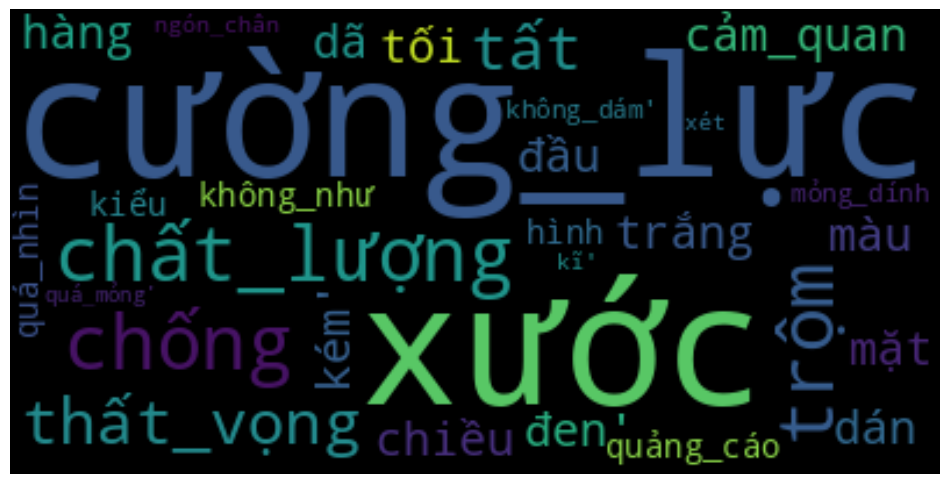

In [63]:
# display the word clouds
plt.figure(figsize=(12, 12))
plt.imshow(wc_notlike, interpolation='bilinear')
plt.axis('off')
plt.show()

### Nhận xét:
- Những sản phẩm bị chê (không hài lòng) chủ yếu rơi vào các vấn đề như chất lượng, kiểu dáng, quảng cáo.
- đó là những từ nổi bật chúng ta cần đào sâu vào từng nhóm ngành phụ.

### Neutral (trung tính)

In [65]:
df_final_neutral = df_final[df_final['class'] == 'neutral' ]
# Neutral
wc_neutral = WordCloud(
    background_color='black',
    max_words=500
)
# generate the word cloud
wc_neutral.generate(str(df_final_neutral['processed_text'].values))

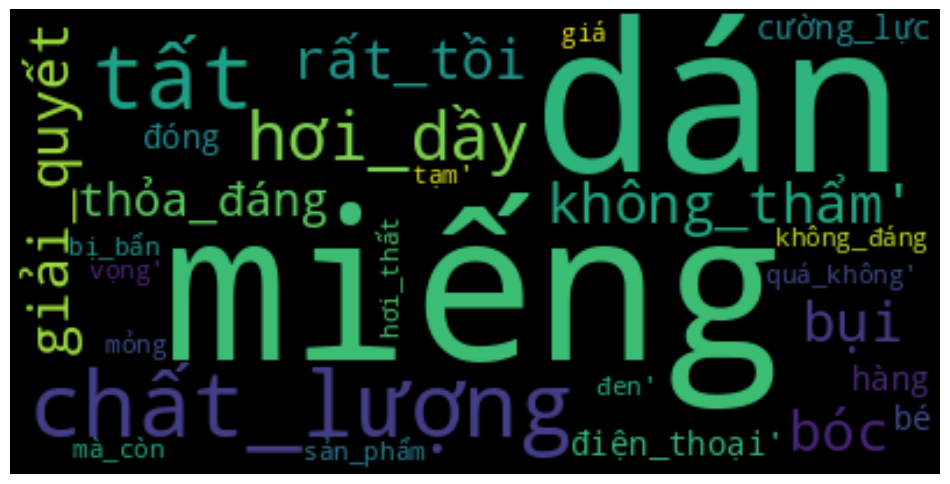

In [66]:
# display the word clouds
plt.figure(figsize=(12, 12))
plt.imshow(wc_neutral, interpolation='bilinear')
plt.axis('off')
plt.show()

### Nhận xét:
- đối với class neutral, ta vẫn thấy có khá nhiều các từ không thích cực, những từ này có thể xếp vào các vấn đề cần phải cải thiện...
- đối với phân loại 2 biến, ta có thể đưa class này vào class negative

### Positive

In [67]:
df_final_like = df_final[df_final['class'] == 'positive' ]
# positive
wc_like = WordCloud(
    background_color='black',
    max_words=500
)
# generate the word cloud
wc_like.generate(str(df_final_like['processed_text'].values))

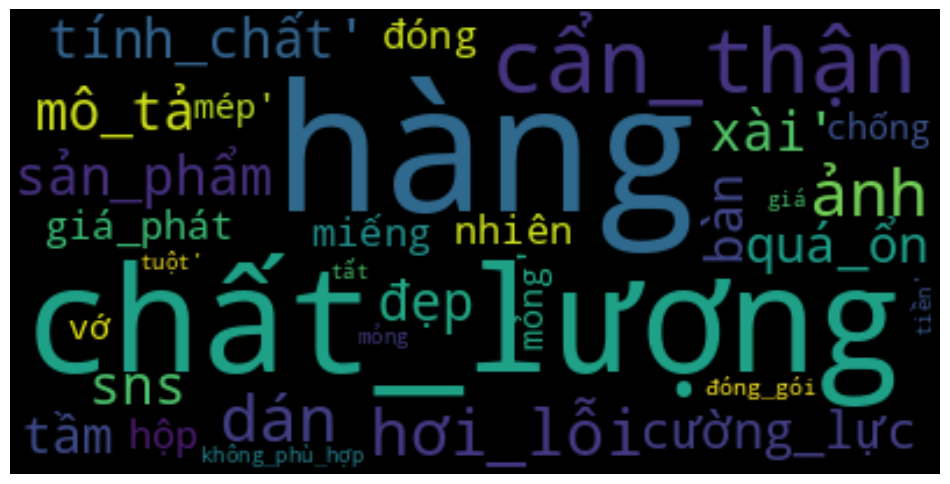

In [68]:
# display the word clouds
plt.figure(figsize=(12, 12))
plt.imshow(wc_like, interpolation='bilinear')
plt.axis('off')
plt.show()

### Nhận xét:
- Các rating hài lòng chủ yếu là các điểm nổi bật như: chất lượng, sản phẩm, giá cả, tặng, cẩn thận...